In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bostonhoustingmlnd/housing.csv


In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [66]:
df = pd.read_csv('/kaggle/input/bostonhoustingmlnd/housing.csv')

In [67]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [68]:
df.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [69]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [70]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [71]:
x = df[['LSTAT','RM']]
y = df['MEDV']

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [73]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [74]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [75]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [76]:
print("r2_score:",r2)
print("mse:",mse)

r2_score: 0.6330155121535985
mse: 8065438130.303487


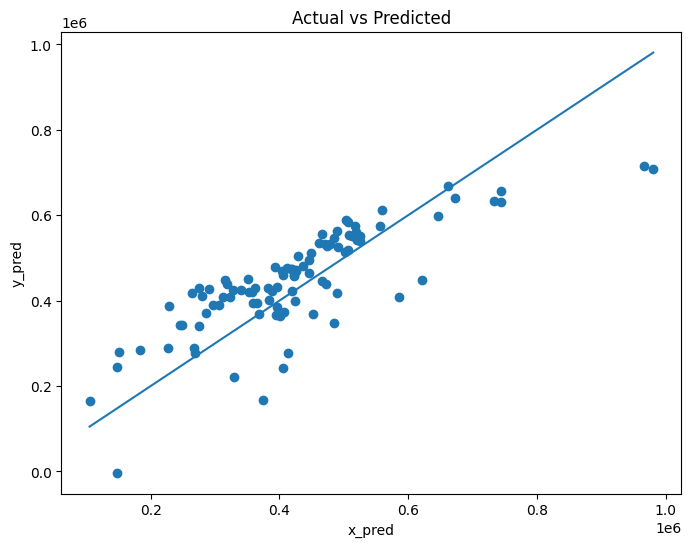

In [77]:
plt.figure(figsize=(8,6))
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.scatter(y_test,y_pred)
plt.title("Actual vs Predicted")
plt.xlabel("x_pred")
plt.ylabel("y_pred")
plt.show()


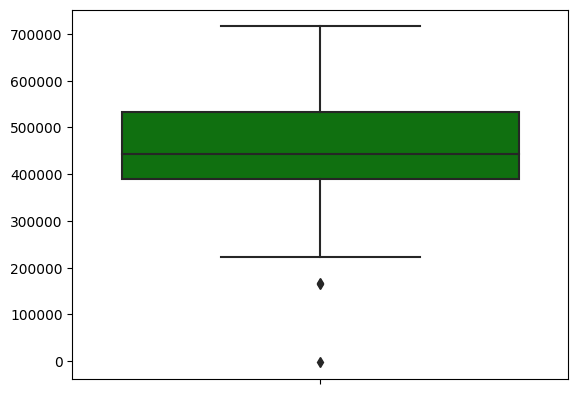

In [78]:
sns.boxplot(data=df,y=y_pred,color='green')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


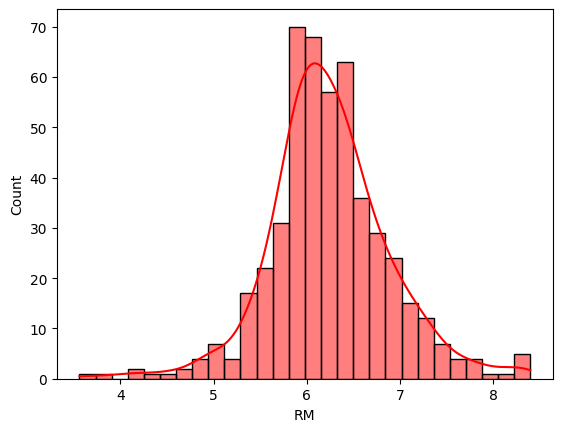

In [79]:
sns.histplot(data=df,x='RM',color='red',kde=True)
plt.show()

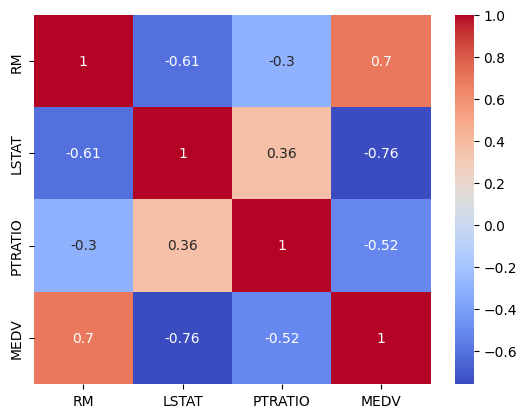

In [80]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()